In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss, roc_auc_score, RocCurveDisplay, roc_curve


(2, 2124)
The Neural Network accuracy is 78.76647834274952
The Neural Network ROC AUC Scores are: 0.6210932298015754
The Neural Network's Weighted Average ROC AUC Score is: 0.6210932298015754
The Neural Network's Logarithmic Loss Score is: 7.653336948442484
The Neural Network F1 Score is: 0.8798934753661785
The Neural Network Confusion Matrix is:
[[  21   26]
 [ 425 1652]]


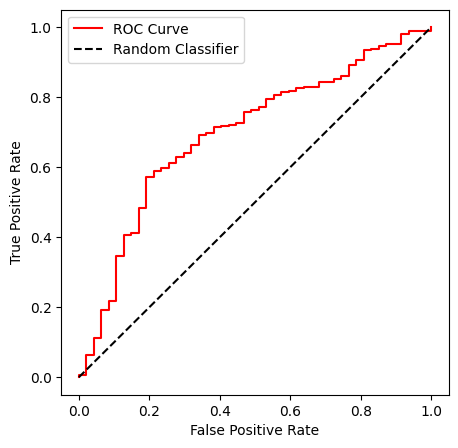

In [38]:
y_pred_df = pd.read_csv('y_pred.csv',index_col=0)
y_proba_df = pd.read_csv('y_proba.csv',index_col=0)
y_test_df = pd.read_csv('y_test.csv',index_col=0)
# COLLATING RESULTS

y_pred = np.array([])
y_proba0 = np.array([])
y_proba1 = np.array([])
y_test = np.array([])

for i in range(1,10):
    y_pred = np.append(y_pred,y_pred_df['iteration '+str(i)])
    y_proba0 = np.append(y_proba0,y_proba_df['class0 iteration '+str(i)])
    y_proba1 = np.append(y_proba1,y_proba_df['class1 iteration '+str(i)])
    y_test = np.append(y_test, y_test_df['iteration '+str(i)])

y_proba=np.ndarray((2,len(y_proba0)))
print(y_proba.shape)
y_proba[0]=y_proba0
y_proba[1]=y_proba1
''' SCORING METRICS '''

accuracy = accuracy_score(y_test, y_pred)*100
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc_weightedavg = roc_auc_score(y_test,y_pred,average='weighted')
logloss = log_loss(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_proba[1])

print('The Neural Network accuracy is ' + str(accuracy))
print('The Neural Network ROC AUC Scores are: '+str(roc_auc))
print("The Neural Network's Weighted Average ROC AUC Score is: " + str(roc_auc_weightedavg))
print("The Neural Network's Logarithmic Loss Score is: " + str(logloss))
print('The Neural Network F1 Score is: '+str(f1))
print('The Neural Network Confusion Matrix is:')
print(confusion)

resultcols = ['Accuracy', 'ROC AUC', 'ROC Weighted Av', 'Logarithmic Loss', 
            'F1 Score', 'CMatrix11','CMatrix12', 'CMatrix21', 'CMatrix22']
resultarray = np.array((accuracy,roc_auc,roc_auc_weightedavg,logloss,f1,
                        confusion[0,0],confusion[0,1],confusion[1,0],confusion[1,1]))
rocresultcols = ['FPR','TPR','Thresholds']
rocresultarray = np.array([fpr,tpr,thresholds])
#print(rocresultarray)
results = pd.DataFrame([resultarray],columns=resultcols)
rocresults = pd.DataFrame(np.array([fpr,tpr,thresholds]).transpose(),columns=rocresultcols)

#results.to_csv("/content/drive/My Drive/Colab Notebooks/imbalanced_trials/results1.csv")
#rocresults.to_csv("/content/drive/My Drive/Colab Notebooks/imbalanced_trials/rocresults1.csv")


fig, ax = plt.subplots(figsize=(5,5))

ax.plot(fpr,tpr,color='red',label='ROC Curve')
ax.plot([0,1],[0,1],linestyle='dashed',label='Random Classifier', color='black')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()